In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib import cm
from io import StringIO
import pandas as pd

In [33]:
data = fits.open('/Users/praewapon/Desktop/Snr Proj/manga-7964-12702-LOGCUBE.fits')

In [34]:
flux = np.transpose(data['FLUX'].data, axes=(2, 1, 0))
ivar = np.transpose(data['IVAR'].data, axes=(2, 1, 0))
mask = np.transpose(data['MASK'].data, axes=(2, 1, 0))
wave = data['WAVE'].data

In [35]:
data.info()

Filename: /Users/praewapon/Desktop/Snr Proj/manga-7964-12702-LOGCUBE.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      75   ()      
  1  FLUX          1 ImageHDU       100   (74, 74, 4563)   float32   
  2  IVAR          1 ImageHDU        17   (74, 74, 4563)   float32   
  3  MASK          1 ImageHDU        17   (74, 74, 4563)   int32   
  4  LSFPOST       1 ImageHDU        11   (74, 74, 4563)   float32   
  5  LSFPRE        1 ImageHDU        11   (74, 74, 4563)   float32   
  6  WAVE          1 ImageHDU         9   (4563,)   float64   
  7  SPECRES       1 ImageHDU         9   (4563,)   float64   
  8  SPECRESD      1 ImageHDU         9   (4563,)   float64   
  9  PRESPECRES    1 ImageHDU         9   (4563,)   float64   
 10  PRESPECRESD    1 ImageHDU         9   (4563,)   float64   
 11  OBSINFO       1 BinTableHDU    148   15R x 65C   [25A, 17A, 5A, J, I, 8A, E, E, E, E, E, E, J, J, I, J, E, 12A, J, 8A, E, E, E, E, E, E, E, E, E

In [36]:
data[0].header

SIMPLE  =                    T /                                                
BITPIX  =                    8 /                                                
NAXIS   =                    0 /                                                
EXTEND  =                    T /                                                
AUTHOR  = 'Brian Cherinka & David Law <bcherinka@stsci.edu, dlaw@stsci.edu>' /  
VERSDRP2= 'v3_1_1  '           / MaNGA DRP version (2d processing)              
VERSDRP3= 'v3_1_1  '           / MaNGA DRP Version (3d processing)              
VERSPLDS= 'v5_1    '           / Platedesign Version                            
VERSFLAT= 'v1_33   '           / Specflat Version                               
VERSCORE= 'v1_9_1  '           / MaNGAcore Version                              
VERSPRIM= 'v2_9    '           / MaNGA Preimaging Version                       
VERSUTIL= 'v5_5_36 '           / Version of idlutils                            
VERSIDL = 'x86_64 linux unix

In [19]:
dap = fits.open('/Users/praewapon/Desktop/Snr Proj/dapall-v3_1_1-3.1.0.fits')

In [20]:
dap.info()

Filename: /Users/praewapon/Desktop/Snr Proj/dapall-v3_1_1-3.1.0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     171   ()      
  1  SPX-MILESHC-MASTARSSP    1 BinTableHDU    193   10782R x 91C   [1K, 1K, 12A, 10A, 1K, 4A, 30A, 1L, 1E, 1E, 1E, 1E, 1K, 1K, 1K, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 8A, 8A, 8A, 8A, 8A, 1K, 1K, 14A, 14A, 14A, 14A, 14A, 14A, 10A, 1E, 15A, 10A, 1K, 1E, 4E, 4E, 1E, 1E, 3E, 3E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 35E, 35E, 35E, 35E, 35E, 35E, 35E, 35E, 35E, 35E, 35E, 35E, 35E, 35E, 46E, 46E, 46E, 46E, 46E, 1E, 1E]   
  2  VOR10-MILESHC-MASTARSSP    1 BinTableHDU    193   10782R x 91C   [1K, 1K, 12A, 10A, 1K, 4A, 30A, 1L, 1E, 1E, 1E, 1E, 1K, 1K, 1K, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 8A, 8A, 8A, 8A, 8A, 1K, 1K, 14A, 14A, 14A, 14A, 14A, 14A, 10A, 1E, 15A, 10A, 1K, 1E, 4E, 4E, 1E, 1E, 3E, 3E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 

In [37]:
index = np.where(dap[1].data['mangaid'] == '1-179139') 
print('index of object with mangaid 1-179139 in dap file =', index[0][0])

# you can also get index using plateifu
plateifu_index = np.where(dap[1].data['plateifu'] == '7964-12702')
print('index of object with mangaid 1-179139 in dap file =', plateifu_index[0][0])

# using the index we found, we can call the drp with that index and get the redshift of the object
redshift = dap[1].data[index[0][0]]['nsa_z']
print('Redshift of object with mangaid 1-179139 in dap file =', redshift)

index of object with mangaid 1-179139 in dap file = 3227
index of object with mangaid 1-179139 in dap file = 3227
Redshift of object with mangaid 1-179139 in dap file = 0.0795422


37 37


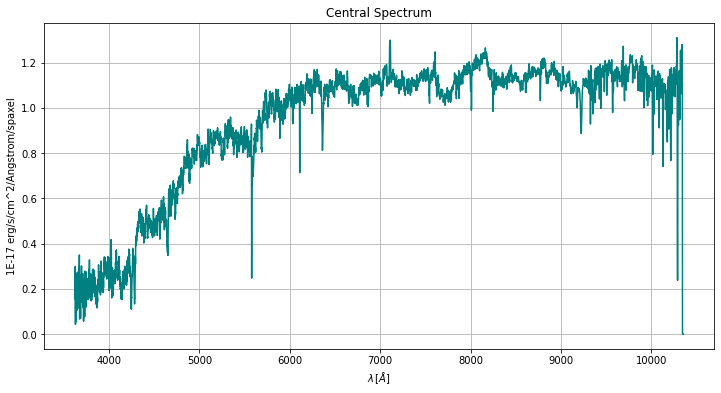

In [38]:
flux_header = data['FLUX'].header 

x_center = int(flux_header['CRPIX1']) - 1
y_center = int(flux_header['CRPIX2']) - 1

print(x_center, y_center) 

plt.figure(figsize = (12, 6)) 
plt.grid() 

plt.plot(wave, flux[x_center, y_center], color = 'teal')

plt.xlabel('$\lambda \, [\AA]$') 

flux_header = data['FLUX'].header 
plt.ylabel(flux_header['BUNIT']) 

plt.title('Central Spectrum') 

plt.show()

In [39]:
do_not_use = (mask & 2**10) != 0 
flux_m = np.ma.array(flux, mask=do_not_use) 

redshift = 0.0795422

# This is the H-alpha range (H-alpha wavelength = 6563 ang)
ind_wave = np.where((wave / (1 + redshift) > 6550) & (wave / (1 + redshift) < 6680))[0]
halpha = flux_m[:, :, ind_wave].sum(axis=2)
im = halpha.T

# Convert from array indices to arcsec relative to IFU center
dx = flux_header['CD1_1'] * 3600.  # deg to arcsec
dy = flux_header['CD2_2'] * 3600.  # deg to arcsec

# extent here gives you the angle subtended by the object in the sky in arcsec
x_extent = (np.array([0., im.shape[0]]) - (im.shape[0] - x_center)) * dx * (-1)
y_extent = (np.array([0., im.shape[1]]) - (im.shape[1] - y_center)) * dy

# The structure is [x_min, x_max, y_min, y_max]
extent = [x_extent[0], x_extent[1], y_extent[0], y_extent[1]]
print('extent =',extent)

# dim gives you the number of pixels in x and y dimensions of the object
dim = [0, len(flux), 0, len(flux)]
print('pixels =',dim)

extent = [-18.5000148, 18.5000148, -18.5000148, 18.5000148]
pixels = [0, 74, 0, 74]


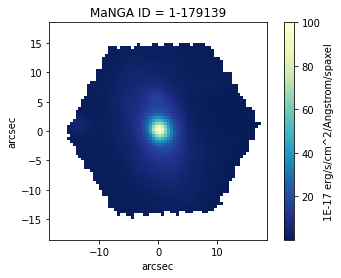

In [40]:
plt.imshow(im, extent=extent, cmap=cm.YlGnBu_r, vmin=0.1, vmax=100, origin='lower', interpolation='none')
plt.colorbar(label=flux_header['BUNIT'])
plt.xlabel('arcsec')
plt.ylabel('arcsec')
plt.title('MaNGA ID = 1-179139')
plt.show()

In [51]:
# sum flux density values element wise to get total flux density

n = len(flux) 
sumflux = np.zeros(4563) 
    
for i in range(n):  
    for j in range(n):
        flux[i,j] = flux[i,j] * ~do_not_use[i,j] #because it's ivar
        
        sumflux = np.add(sumflux, flux[i,j])

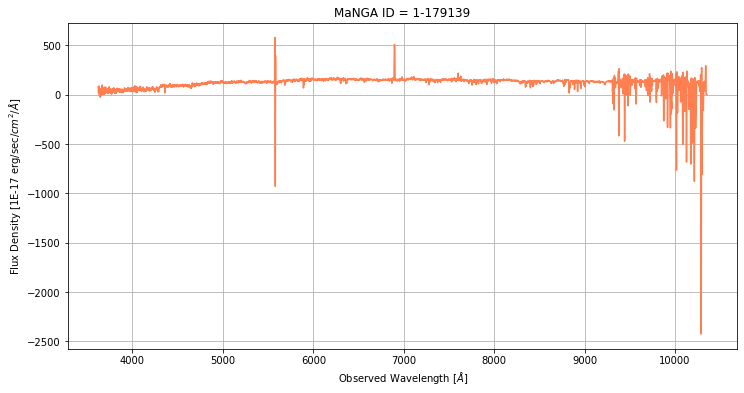

In [44]:
plt.figure(figsize = (12,6))
plt.grid()
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
plt.title('MaNGA ID = 1-179139')

plt.plot(wave, sumflux, color = 'coral')


In [48]:
#find rest frame wavelength
rest_wave = wave / (1+redshift)

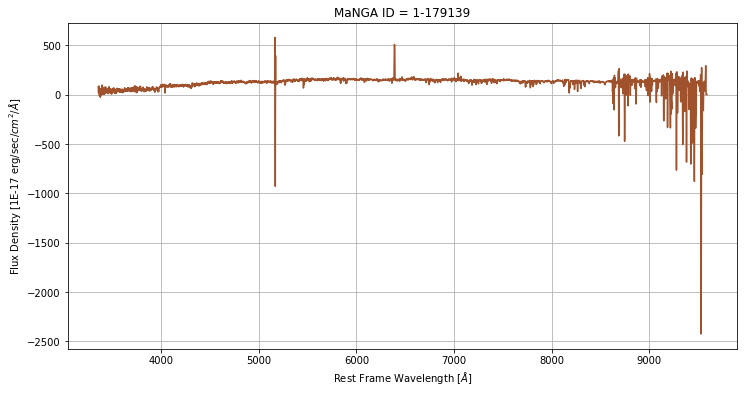

In [49]:
plt.figure(figsize = (12,6))
plt.grid()
plt.xlabel('Rest Frame Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
plt.title('MaNGA ID = 1-179139')
plt.plot(rest_wave, sumflux, color = 'sienna')